In [2]:
include("../src/SimulationsUtils.jl") 
include("../src/WassersteinVariance.jl")
include("../src/MethodUtils.jl")
using Plots
using StatsBase
using LaTeXStrings
pyplot()

┌ Info: Precompiling Lasso [b4fcebef-c861-5a0f-a7e2-ba9dc32b180a]
└ @ Base loading.jl:1317


Plots.PyPlotBackend()

In [3]:
Random.seed!(123)
d = Normal()
E, nₑ, p = 5, 500, 2
n = nₑ*E
nₑs = repeat([nₑ], E)
nsims = 10_000
wvs = Float64[]
for i in 1:nsims
    X = zeros(n,p)
    β = zeros(p)
    y = rand(d, n)
    wv = DirectWassersteinVariance(X, y, nₑs, nₑs / n)
    push!(wvs, wv(β)*n)
end

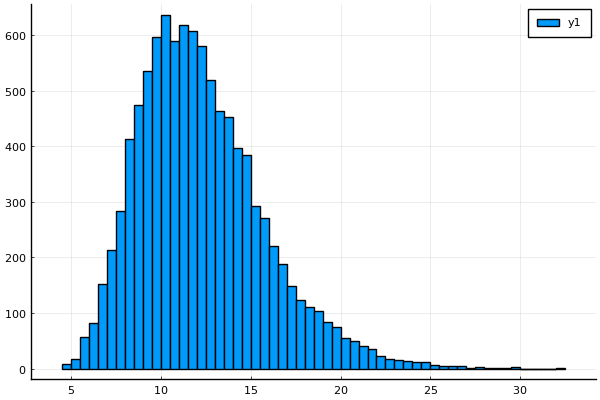

In [4]:
histogram(wvs)

In [5]:
m, v = mean(wvs), var(wvs)
sh = m^2 / v
sc = v / m

e = ecdf(wvs)
xs = collect([0:0.01:35]);

1-element Vector{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}:
 0.0:0.01:35.0

In [6]:
Random.seed!(123)
inc = 10
res = get_asympt_dist(rand(d, n.*inc), nₑs.*inc, parabolic_func, 0.1, 1_000)

Gamma{Float64}(α=12.345967239910449, θ=1.0017393503620569)

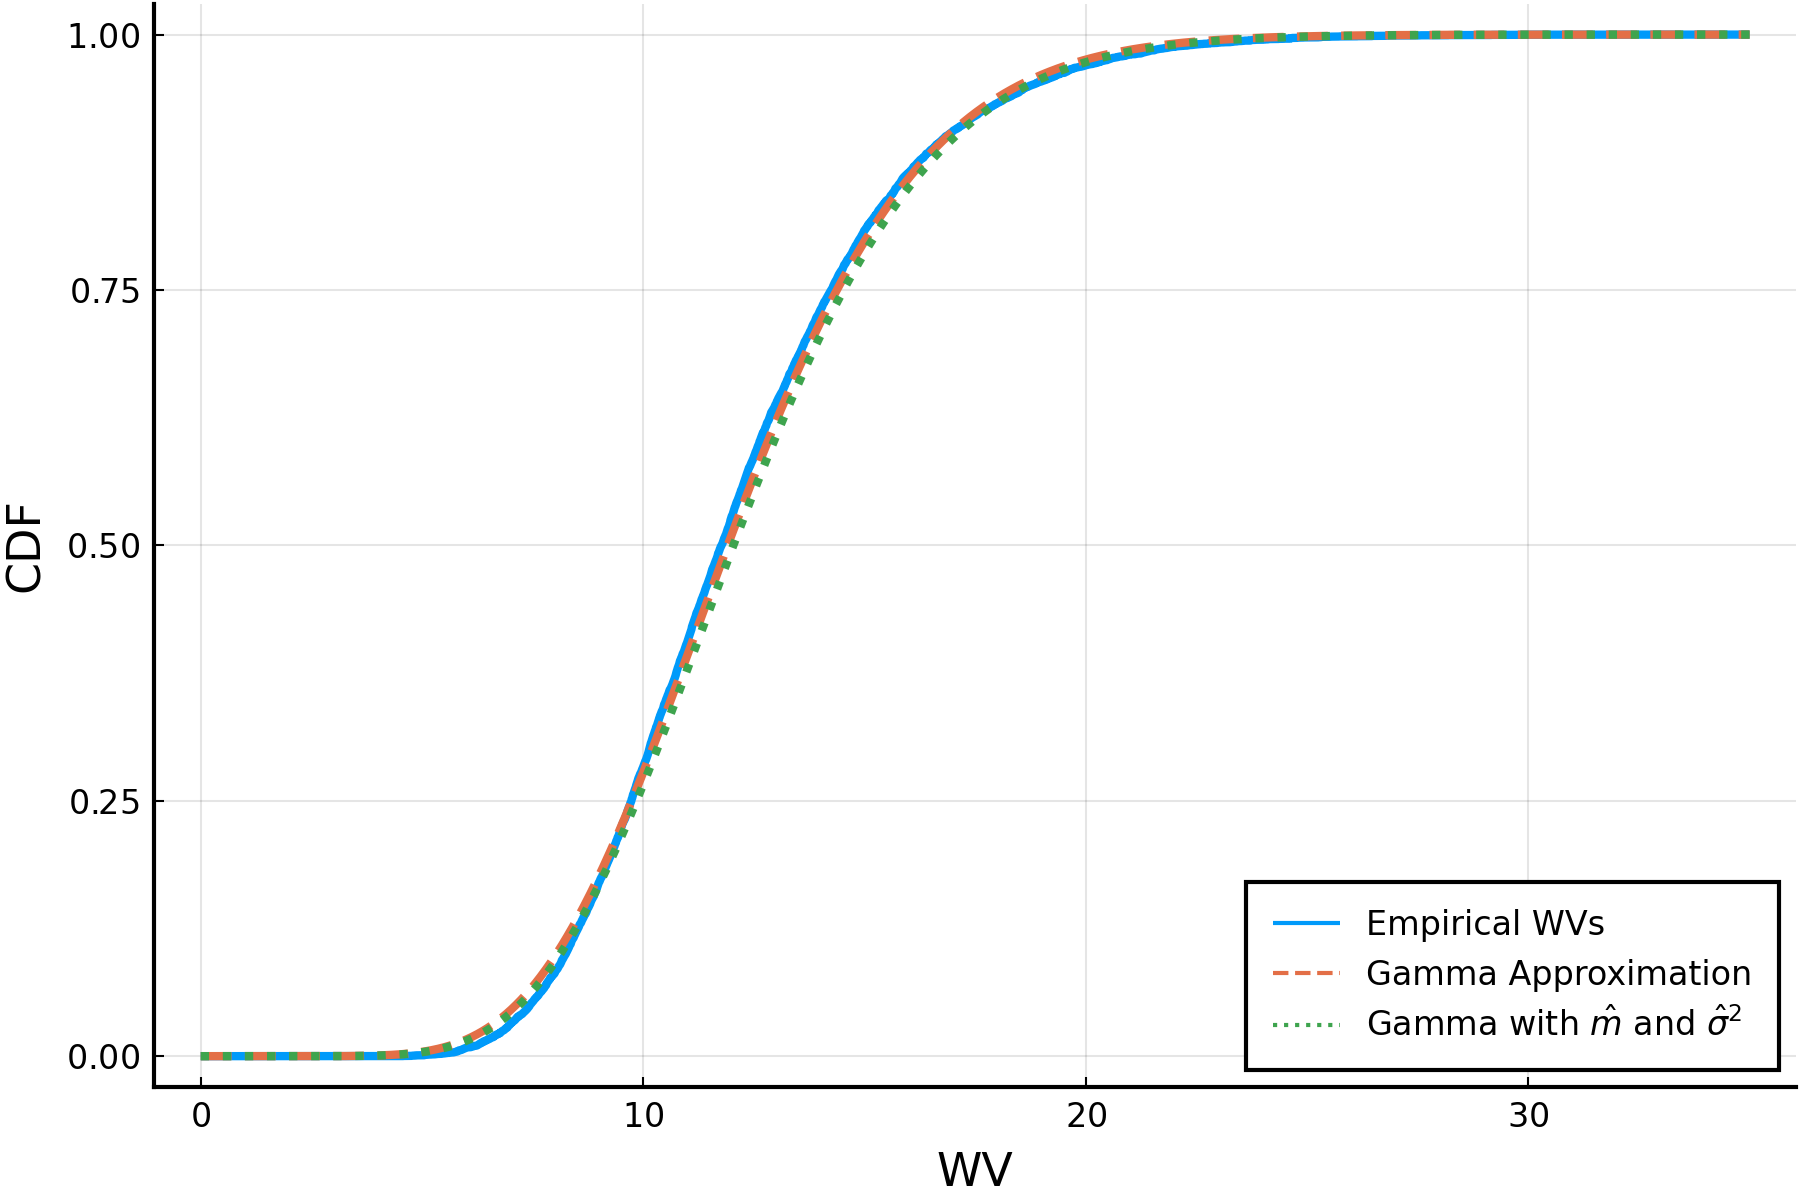

In [7]:
# Figure 6
w = 2
s = L"Gamma with $\hat{m}$ and $\hat{\sigma}^2$"
plot(xs, e.(xs), label="Empirical WVs", ls=:solid, lw=w)
plot!(xs, cdf.(Gamma(sh, sc), xs), label="Gamma Approximation", legend=:bottomright, ls=:dash, lw=w, xlab="WV", ylab="CDF", dpi=300)
plot!(xs, cdf.(res, xs), label=s, ls=:dot, lw=w)